In [16]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [53]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

<IPython.core.display.Javascript object>

In [17]:
dataset = pd.read_csv("data/data_image.csv")
dataset

,image_name,full_path,kind,flag
0,IM-0115-0001.jpeg,data/train/NORMAL/IM-0115-0001.jpeg,train,0
1,IM-0117-0001.jpeg,data/train/NORMAL/IM-0117-0001.jpeg,train,0
2,IM-0119-0001.jpeg,data/train/NORMAL/IM-0119-0001.jpeg,train,0
3,IM-0122-0001.jpeg,data/train/NORMAL/IM-0122-0001.jpeg,train,0
4,IM-0125-0001.jpeg,data/train/NORMAL/IM-0125-0001.jpeg,train,0
...,...,...,...,...
5851,person1949_bacteria_4880.jpeg,data/val/PNEUMONIA/person1949_bacteria_4880.jpeg,val,1
5852,person1950_bacteria_4881.jpeg,data/val/PNEUMONIA/person1950_bacteria_4881.jpeg,val,1
5853,person1951_bacteria_4882.jpeg,data/val/PNEUMONIA/person1951_bacteria_4882.jpeg,val,1
5854,person1952_bacteria_4883.jpeg,data/val/PNEUMONIA/person1952_bacteria_4883.jpeg,val,1


<IPython.core.display.Javascript object>

In [97]:
df = dataset.kind.value_counts().reset_index()
fig = px.bar(
    df,
    x="index",
    y="kind",
    text="kind",
    height=400,
)

fig.update_layout(
    title="Dataset's size per category (Train, Test, Validation).",
    xaxis_title="Categories",
    yaxis_title="Size (Sample)",
    legend_title="Legend Title",
    font=dict(family="Courier New, monospace", size=12, color="RebeccaPurple"),
)

fig.show()

<IPython.core.display.Javascript object>

# Train

In [49]:
df = dataset[["kind", "flag"]].value_counts().reset_index()
df.columns = ["Kind", "Flag", "Size"]

,Kind,Flag,Size
0,train,1,3875
1,train,0,1341
2,test,1,390
3,test,0,234
4,val,0,8
5,val,1,8


<IPython.core.display.Javascript object>

In [80]:
kinds = list(df.Kind.unique())

y_normal = df[df.Flag == 1].Size.unique()
y_pneu = df[df.Flag == 0].Size.unique()

fig = go.Figure(data=[
    go.Bar(name='Normal', x=kinds, y=y_normal, text=y_normal),
    go.Bar(name='Pneumonia', x=kinds, y=y_pneu, text=y_pneu),
])

fig.update_layout(barmode='group')
fig.show()

<IPython.core.display.Javascript object>

# Imbalance

In [94]:
aux_train = df[df.Kind == "train"]

<IPython.core.display.Javascript object>

In [96]:
aux_train["Size"] / aux_train["Size"].sum()

0    0.742906
1    0.257094
Name: Size, dtype: float64

<IPython.core.display.Javascript object>

### 1 =  3/4 + 1/4 

Imbalance class

In [99]:
dataset

,image_name,full_path,kind,flag
0,IM-0115-0001.jpeg,data/train/NORMAL/IM-0115-0001.jpeg,train,0
1,IM-0117-0001.jpeg,data/train/NORMAL/IM-0117-0001.jpeg,train,0
2,IM-0119-0001.jpeg,data/train/NORMAL/IM-0119-0001.jpeg,train,0
3,IM-0122-0001.jpeg,data/train/NORMAL/IM-0122-0001.jpeg,train,0
4,IM-0125-0001.jpeg,data/train/NORMAL/IM-0125-0001.jpeg,train,0
...,...,...,...,...
5851,person1949_bacteria_4880.jpeg,data/val/PNEUMONIA/person1949_bacteria_4880.jpeg,val,1
5852,person1950_bacteria_4881.jpeg,data/val/PNEUMONIA/person1950_bacteria_4881.jpeg,val,1
5853,person1951_bacteria_4882.jpeg,data/val/PNEUMONIA/person1951_bacteria_4882.jpeg,val,1
5854,person1952_bacteria_4883.jpeg,data/val/PNEUMONIA/person1952_bacteria_4883.jpeg,val,1


<IPython.core.display.Javascript object>

# Sample

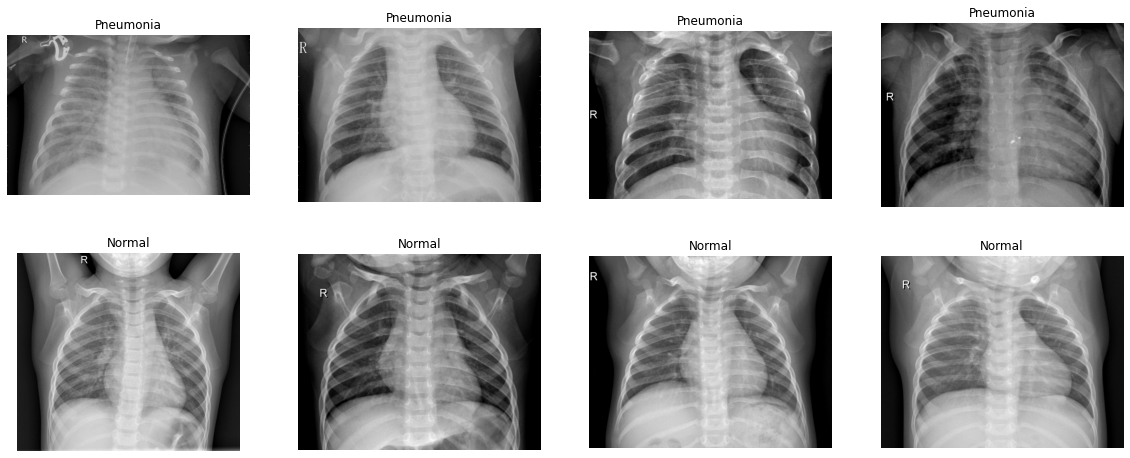

<IPython.core.display.Javascript object>

In [106]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
for i, img_path in enumerate(dataset[dataset["flag"] == 1][0:4]["full_path"]):
    plt.subplot(2, 4, i + 1)
    plt.axis("off")
    img = plt.imread(img_path)
    plt.imshow(img, cmap="gray")
    plt.title("Pneumonia")

for i, img_path in enumerate(dataset[dataset["flag"] == 0][0:4]["full_path"]):
    plt.subplot(2, 4, 4 + i + 1)
    plt.axis("off")
    img = plt.imread(img_path)
    plt.imshow(img, cmap="gray")
    plt.title("Normal")